## Modelling the Car-Pricing data

### Importing CarsPrice-EDA.csv file for Modelling

In [29]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

In [30]:
df = pd.read_csv('carsPrice-EDA.csv')

In [31]:
df.head()

,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,body_hatchback,body_sedan,body_wagon,fuel_2bbl,fuel_4bbl,fuel_idi,fuel_mfi,fuel_mpfi,fuel_spdi,fuel_spfi
0,1,0,2,94.5,168.8,64.1,48.8,2548,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0,2,94.5,168.8,64.1,48.8,2548,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,2,94.5,171.2,65.5,52.4,2823,1,6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0,4,99.8,176.6,66.2,54.3,2337,1,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,4,99.4,176.6,66.4,54.3,2824,1,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Model Building

### LinearRegression

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [136]:
#seperating data into independent variables and dependent variable
X_lr = df.drop('price', axis = 1)
X_lr.head()

,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,body_hatchback,body_sedan,body_wagon,fuel_2bbl,fuel_4bbl,fuel_idi,fuel_mfi,fuel_mpfi,fuel_spdi,fuel_spfi
0,1,0,2,94.5,168.8,64.1,48.8,2548,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0,2,94.5,168.8,64.1,48.8,2548,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,2,94.5,171.2,65.5,52.4,2823,1,6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0,4,99.8,176.6,66.2,54.3,2337,1,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,4,99.4,176.6,66.4,54.3,2824,1,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [138]:
Y_lr = df["price"]
Y_lr.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [140]:
#splitting the dataset into train and test
X_lr_train,X_lr_test,Y_lr_train,Y_lr_test=train_test_split(X_lr,Y_lr,test_size=0.3,random_state=2)

#### Checking for highly correlated features

In [141]:
correlation = X_lr.corr()
correlation

,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,body_hatchback,body_sedan,body_wagon,fuel_2bbl,fuel_4bbl,fuel_idi,fuel_mfi,fuel_mpfi,fuel_spdi,fuel_spfi
fueltype,1.000000,-0.408361,-0.210464,-0.304123,-0.272660,-0.321369,-0.289575,-0.317903,0.235766,-0.060203,...,0.209857,-0.174455,-0.034754,0.245138,0.042640,-1.000000,0.024483,0.278362,0.075117,0.024483
aspiration,-0.408361,1.000000,0.013972,0.259106,0.290930,0.388203,0.086274,0.436742,-0.164568,0.013137,...,-0.007674,0.011093,0.022516,-0.354537,-0.061670,0.408361,0.155174,-0.031939,0.411131,-0.035409
doornumber,-0.210464,0.013972,1.000000,0.409822,0.395585,0.220083,0.529812,0.220665,-0.096412,0.090496,...,-0.641303,0.505649,0.334857,0.016276,-0.149786,0.210464,-0.086003,0.031246,-0.161674,-0.086003
wheelbase,-0.304123,0.259106,0.409822,1.000000,0.841928,0.801666,0.593516,0.771503,-0.276339,0.351657,...,-0.363419,0.226789,0.207376,-0.494921,-0.102266,0.304123,-0.044052,0.474410,-0.148492,-0.041607
carlength,-0.272660,0.290930,0.395585,0.841928,1.000000,0.841529,0.534175,0.871134,-0.341674,0.296931,...,-0.399519,0.195462,0.286053,-0.490324,-0.046139,0.272660,0.002292,0.485577,-0.071469,-0.001820
carwidth,-0.321369,0.388203,0.220083,0.801666,0.841529,1.000000,0.342317,0.849093,-0.410184,0.276523,...,-0.162480,0.103700,0.107065,-0.564801,0.013844,0.321369,0.036471,0.448798,-0.012885,-0.015820
carheight,-0.289575,0.086274,0.529812,0.593516,0.534175,0.342317,1.000000,0.397488,-0.172748,0.137761,...,-0.492006,0.207771,0.482966,-0.095554,-0.221683,0.289575,-0.108923,0.140417,-0.300815,-0.072203
curbweight,-0.317903,0.436742,0.220665,0.771503,0.871134,0.849093,0.397488,1.000000,-0.360190,0.414701,...,-0.236954,0.017283,0.264789,-0.597885,-0.029385,0.317903,0.056284,0.467871,0.036065,0.043164
enginetype,0.235766,-0.164568,-0.096412,-0.276339,-0.341674,-0.410184,-0.172748,-0.360190,1.000000,0.315812,...,0.058486,-0.004587,-0.119961,0.221772,-0.432049,-0.235766,0.022149,-0.031147,0.067958,0.022149
cylindernumber,-0.060203,0.013137,0.090496,0.351657,0.296931,0.276523,0.137761,0.414701,0.315812,1.000000,...,-0.129680,0.112054,0.029597,-0.179688,-0.425722,0.060203,-0.017946,0.304210,-0.055062,-0.017946


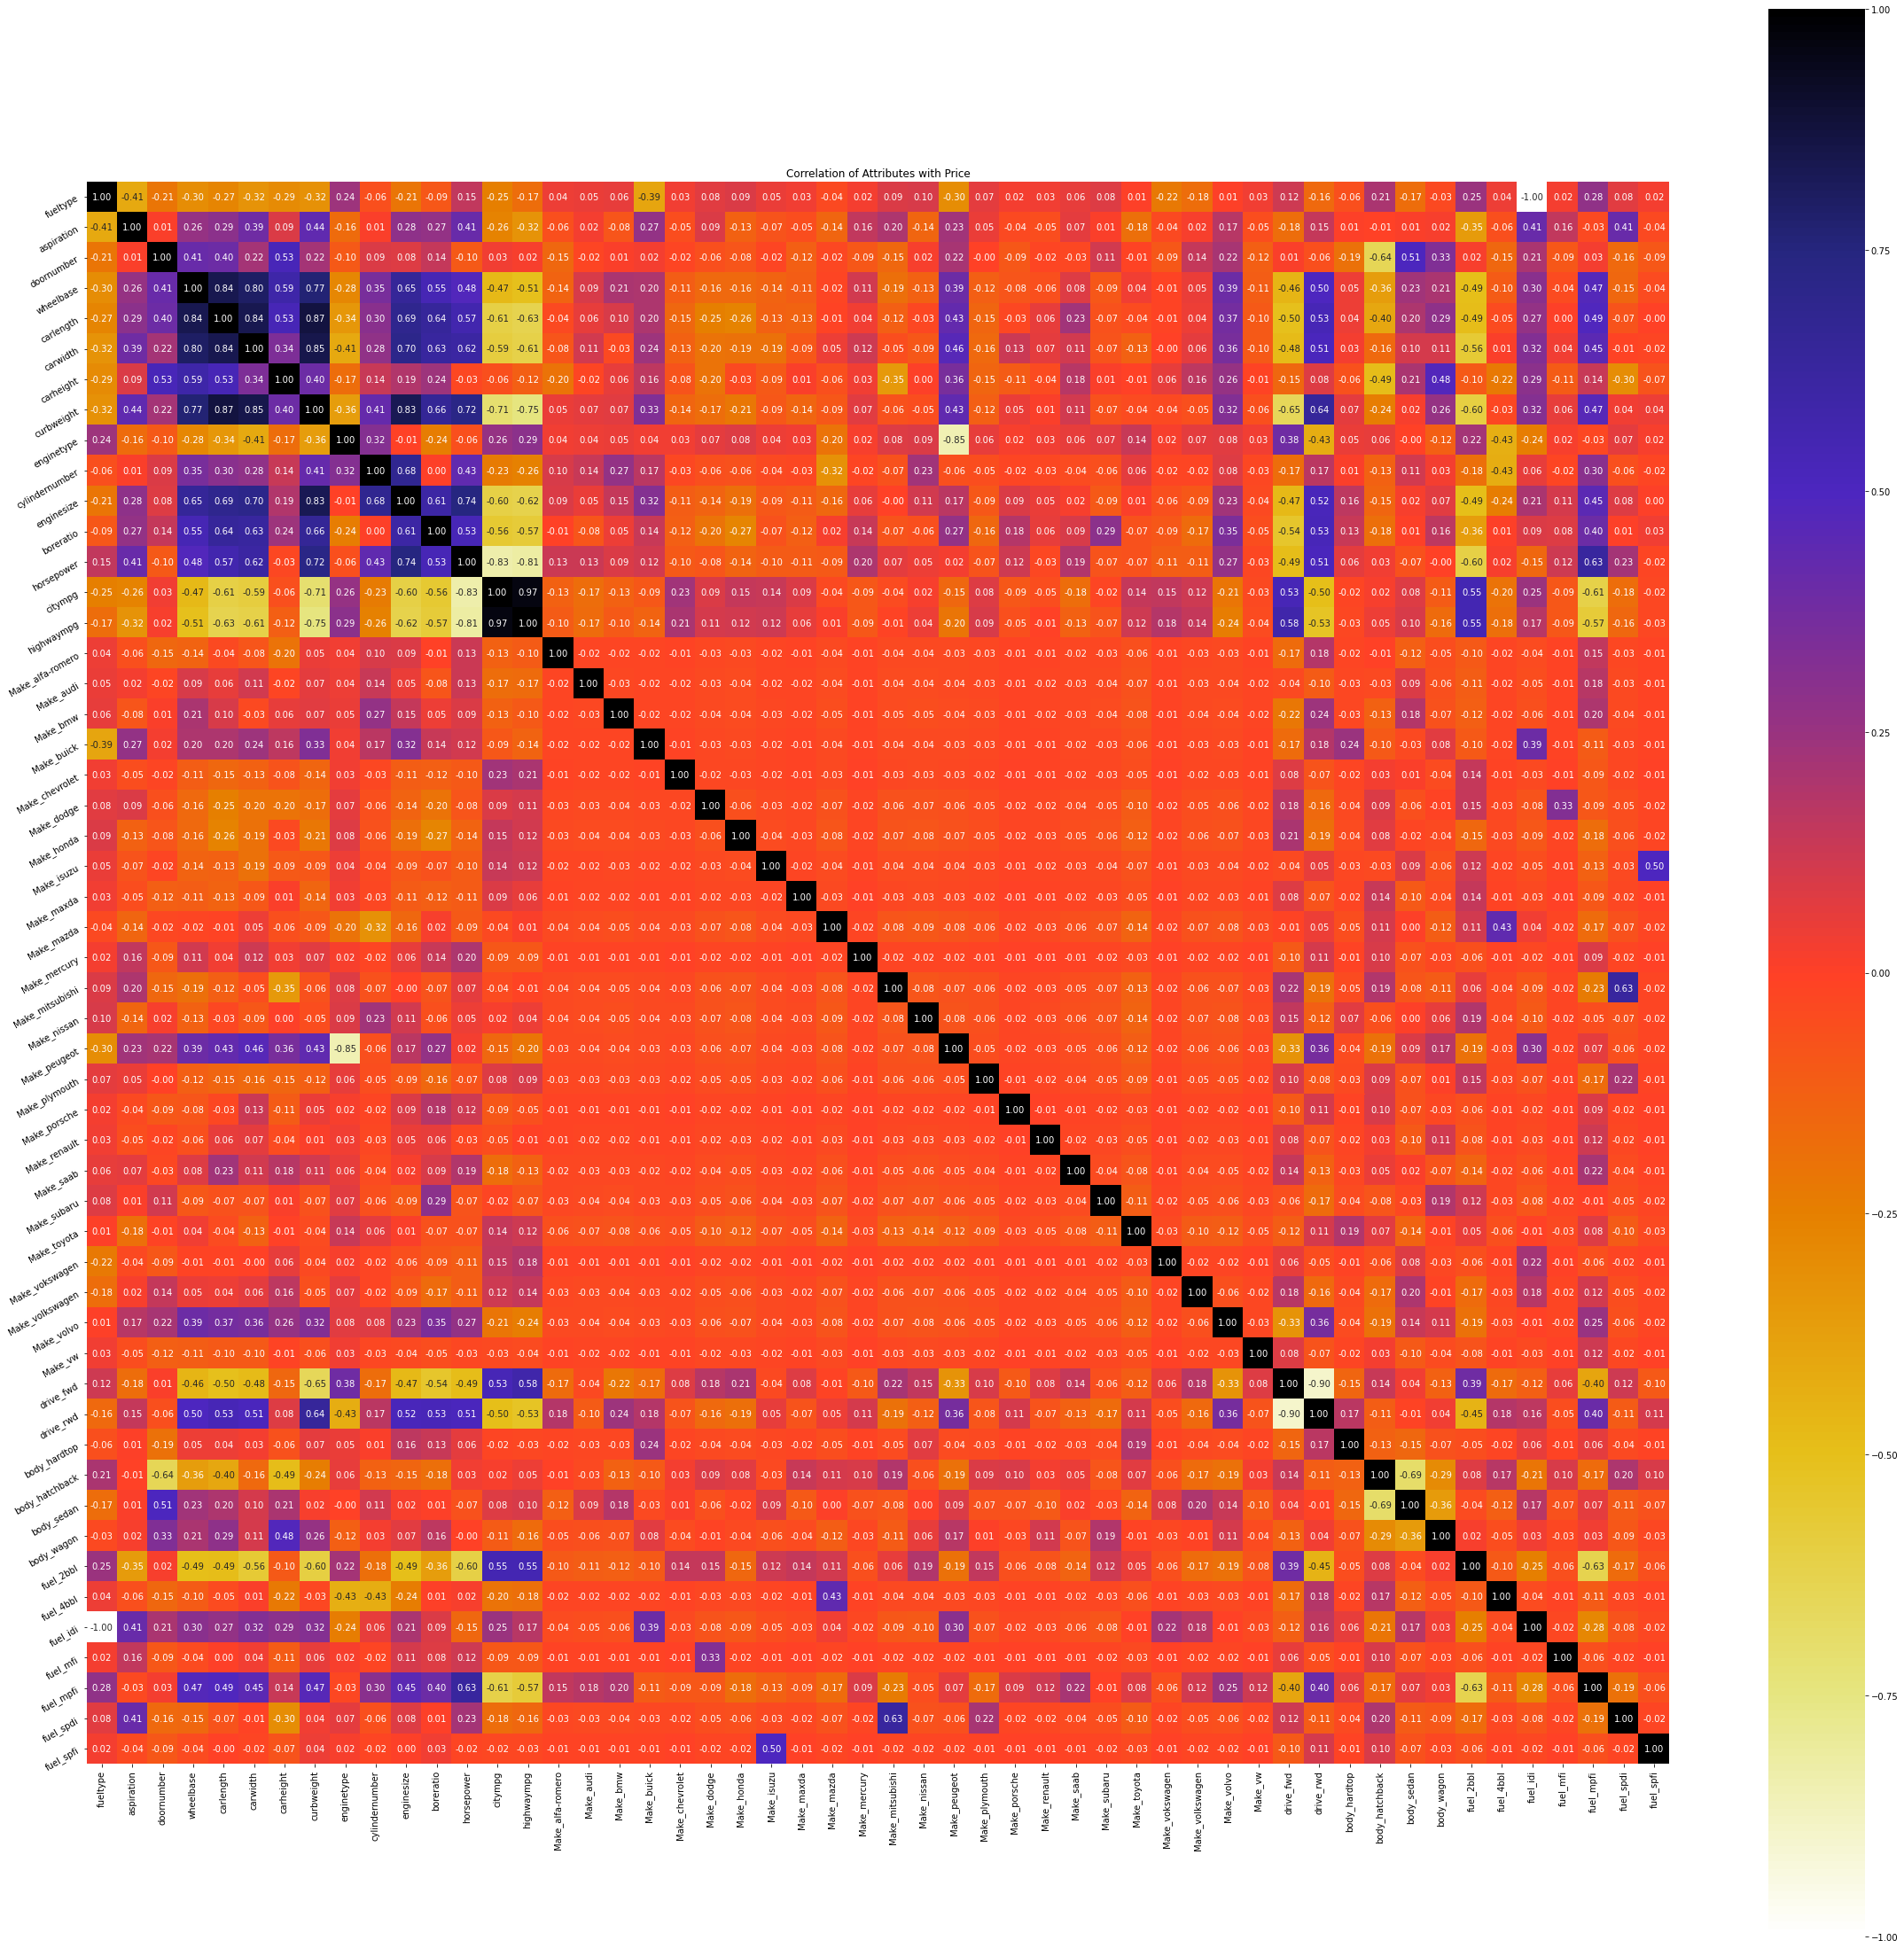

In [142]:
#Using Pearson Correlation
plt.figure(figsize=(40,40))
plt.title('Correlation of Attributes with Price')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', cmap=plt.cm.CMRmap_r)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [143]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [145]:
corr_features = correlation(X_lr_train, 0.9)
len(set(corr_features))

3

In [146]:
corr_features

{'drive_rwd', 'fuel_idi', 'highwaympg'}

In [147]:
# dropping the highly correlated features for training and testing data
X_lr_train.drop(corr_features,axis=1).head()
X_lr_test.drop(corr_features,axis=1).head()

,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,body_hardtop,body_hatchback,body_sedan,body_wagon,fuel_2bbl,fuel_4bbl,fuel_mfi,fuel_mpfi,fuel_spdi,fuel_spfi
6,1,1,2,99.5,178.2,67.9,52.0,3053,1,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
156,1,0,2,102.4,183.5,67.7,52.0,2976,1,6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
108,1,0,4,96.1,181.5,66.5,55.2,2579,1,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
137,0,0,4,95.7,166.3,64.4,52.8,2275,1,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,1,0,2,94.5,155.9,63.6,52.0,1874,1,4,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [148]:
#fitting linear regression
regressor=LinearRegression(normalize=True)
regressor.fit(X_lr_train,Y_lr_train)

LinearRegression(normalize=True)

In [149]:
print(regressor.intercept_)
print(regressor.coef_)

11144.999214913187
[-1.19356207e+03  1.36716083e+03  1.31813127e+02  3.28407009e+02
 -3.45795981e+01 -1.20678411e+02 -3.42896633e+02  5.28297476e+00
 -1.14829746e+03  1.53002766e+02  5.82515323e+00 -2.62459770e+03
  3.40477751e-01 -1.81312986e+02  6.39293746e+01 -1.57622674e+03
  4.38003634e+03  5.79714822e+03  2.43926830e+03 -1.09139364e-11
 -1.38279526e+03  2.18688943e+03  2.96422205e+03 -1.39415669e+02
  1.94925484e+03  1.46829783e+03 -1.20583722e+03  1.18630412e+03
 -7.44358481e+02 -1.46964510e+03  8.70706564e+03  2.69111917e+02
  3.83920042e+03  8.88807686e+02 -5.66660460e+02  1.01840617e+02
  1.10756269e+03  3.18477322e+03  8.34388232e+02 -2.48014940e+02
  1.53265129e+03 -4.94861766e+03 -3.99030256e+03 -4.01731577e+03
 -4.17696874e+03  1.82190474e+03 -9.11644666e+02  1.19356207e+03
  2.79917699e+03  1.56646504e+03  1.64304171e+03 -2.87042203e+03]


In [150]:
#prediction
pred = regressor.predict(X_lr_test)
print(pred)

[20881.80455657 15908.56580327  8838.56362363  7536.83503139
  5755.0259832  13407.17798491  8952.338249   13893.52380873
  7290.20114966 12281.79256311 10844.6953179   9341.40266647
  7560.68332627  8811.43520964  8340.03566158  7465.00583499
 16307.44441421  6076.26230185 16684.12640357  7919.59657017
  8619.51083933  7716.18201205 20708.2053035  14599.24589607
 13033.44170594  6411.34184393 15743.794274   13917.81858618
 16006.95527498 21422.16470306 15295.06734831 11146.68380835
 12153.54016418 15803.12944366 10685.30791107 21468.53020956
  5900.61591123  6064.63732726 17317.11081507 16238.37643143
  6454.59169282  6629.35063089  8101.26569157  9943.76340514
 11156.02176719 10702.42662286 14889.12855218  8641.73366595
  9202.91884405 11989.41335673 16512.08396622  6807.16879403
  4931.97465117 16217.64010476  9341.48909044]


In [151]:
df_pred = pd.DataFrame({'Actual': Y_lr_test, 'Predicted': pred})
df_pred

,Actual,Predicted
6,17859.167,20881.804557
156,16558.000,15908.565803
108,9295.000,8838.563624
137,7788.000,7536.835031
12,6295.000,5755.025983
35,6785.000,13407.177985
164,8495.000,8952.338249
3,13950.000,13893.523809
139,8358.000,7290.201150
45,11845.000,12281.792563


In [152]:
type(df_pred)

pandas.core.frame.DataFrame

In [153]:
# r2_score
score=r2_score(Y_lr_test,pred)
score

0.8833246892137171

In [154]:
# finding metrics
from sklearn import metrics

In [156]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_lr_test, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_lr_test, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_lr_test, pred)))

Mean Absolute Error: 1069.562458073239
Mean Squared Error: 2348480.9732004306
Root Mean Squared Error: 1532.475439672829


## Building Linear Regression using OLS Method

In [63]:
#While Splitting the data into Train and Test we have to add a constant column 
import statsmodels.api as sm
#splitting the dataset into train and test
X=sm.add_constant(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
print(X_train.head())

     const  fueltype  aspiration  doornumber  wheelbase  carlength  carwidth  \
125    1.0         1           0           4       97.0      173.5      65.4   
40     1.0         1           0           2       94.5      159.1      64.2   
108    1.0         1           0           4       96.1      181.5      66.5   
22     1.0         1           1           2       95.9      173.2      66.3   
166    1.0         1           0           4       97.3      171.7      65.5   

     carheight  curbweight  enginetype  ...  body_hatchback  body_sedan  \
125       53.0        2455           1  ...             0.0         0.0   
40        54.1        1900           1  ...             1.0         0.0   
108       55.2        2579           1  ...             0.0         0.0   
22        50.2        2811           1  ...             1.0         0.0   
166       55.7        2300           1  ...             0.0         1.0   

     body_wagon  fuel_2bbl  fuel_4bbl  fuel_idi  fuel_mfi  fuel_mpfi

In [64]:
from scipy import stats
model_ols=sm.OLS(Y_train,X_train).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     39.77
Date:                Sun, 29 Aug 2021   Prob (F-statistic):           5.08e-39
Time:                        18:11:23   Log-Likelihood:                -1046.3
No. Observations:                 128   AIC:                             2195.
Df Residuals:                      77   BIC:                             2340.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.996e+04   1.18e+04  

In [65]:
Y_pred_train=model_ols.predict(X_train)
pd.DataFrame(Y_pred_train,columns=['Train_data_predicted_values'])

,Train_data_predicted_values
125,9694.175570
40,6002.980593
108,9397.308990
22,12964.000000
166,9141.795292
...,...
103,6295.747349
67,13204.338478
117,6729.515572
47,15645.000000


In [66]:
pd.DataFrame({'predicted_train_values':Y_pred_train,'Actual__train_values':Y_train})

,predicted_train_values,Actual__train_values
125,9694.175570,10198.0
40,6002.980593,6095.0
108,9397.308990,9295.0
22,12964.000000,12964.0
166,9141.795292,9995.0
...,...,...
103,6295.747349,6692.0
67,13204.338478,14869.0
117,6729.515572,7053.0
47,15645.000000,15645.0


In [67]:
Y_pred_test=model_ols.predict(X_test)
pd.DataFrame(Y_pred_test,columns=['Test_data_predicted_values'])

,Test_data_predicted_values
94,16464.646835
18,6917.379406
33,9631.395966
98,16464.646835
173,15868.327165
169,11762.141775
7,17826.395625
138,8052.734302
61,6492.522645
74,6995.320243


In [68]:
pd.DataFrame({'Predicted_test_values':Y_pred_test,'Actual__test_values':Y_test})

,Predicted_test_values,Actual__test_values
94,16464.646835,16900.0
18,6917.379406,6692.0
33,9631.395966,12945.0
98,16464.646835,17950.0
173,15868.327165,13415.0
169,11762.141775,13295.0
7,17826.395625,16430.0
138,8052.734302,7738.0
61,6492.522645,6189.0
74,6995.320243,6649.0


#### Calculating MAE,MSE,RMSE for Train Data of OLS method

In [70]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_train, Y_pred_train))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_train, Y_pred_train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train)))

Mean Absolute Error: 646.0363494799495
Mean Squared Error: 736845.8617272764
Root Mean Squared Error: 858.3972633502954


#### Calculating MAE,MSE,RMSE for Test Data of OLS method

In [69]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test)))

Mean Absolute Error: 1365.0607001922428
Mean Squared Error: 3377937.208830165
Root Mean Squared Error: 1837.9165402243284


In [72]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF Predictors"] = X.columns
vif

C:\Users\Fleena\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Fleena\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,VIF Predictors
0,0.000000,const
1,inf,fueltype
2,5.582802,aspiration
3,3.620316,doornumber
4,12.481516,wheelbase
5,15.318502,carlength
6,16.895718,carwidth
7,7.950258,carheight
8,33.840953,curbweight
9,34.167004,enginetype


In [73]:
print(vif["VIF Factor" ].sort_values(ascending=False))

1           inf
48          inf
14    37.426100
11    36.372897
50    36.116195
9     34.167004
8     33.840953
29    33.319000
46    30.082738
15    29.640647
44    29.553180
43    23.637900
12    20.284653
10    20.120233
13    19.988497
41    19.980025
6     16.895718
35    15.554336
5     15.318502
45    15.178536
22    14.585453
40    13.310194
4     12.481516
27     9.698208
51     9.685500
25     8.795739
38     8.689970
7      7.950258
28     7.839855
21     7.280454
37     7.216478
47     6.324979
30     5.763402
2      5.582802
33     5.575377
34     5.181374
19     4.336056
18     4.166542
16     4.037697
17     3.978657
23     3.840566
42     3.665006
3      3.620316
39     2.788685
32     2.713729
52     2.441085
49     2.364186
20     2.259410
24     2.156724
31     2.065648
36     2.021890
26     1.827305
0      0.000000
Name: VIF Factor, dtype: float64


#### Multicollinearity always exists in pairs.

- Here are the Multicollinearity exists between :

##### ( Fuel_idi & Fueltype, corr= -1.00 ) , ( Citympg & Highwaympg, corr= 0.97 ) , (drive_rwd & drive_fwd, corr= 0.90 ) , 
##### ( carlength & curbweight, corr = 0.87 ) , ( Make_peugeot & enginetype, corr=0.85 ) , (carwidth & wheelbase, corr = 0.80 ) , 
##### ( enginesize & horsepower, corr = 0.74 ) , ( body_hatchback & body_sedan, corr = 0.69 ) , 
##### ( fuel_mpfi & fuel_2bbl, corr = 0.63 ) 

- It's good to drop the variables with high VIF from the pair so that the other one get's adjusted.

###### Let's drop Fuel_idi, Citympg, drive_rwd, curbweight, Make_peugeot, carwidth, enginesize, body_sedan, fuel_mpfi and build the   model.

### Rebuilding the OLS model by dropping the below columns

In [125]:
Xx = df.drop(["fuel_idi", "citympg", "curbweight", "Make_peugeot", "carwidth", "enginesize", "body_sedan", "fuel_mpfi", "drive_rwd", "price"] ,axis=1)
Xx.head()

,fueltype,aspiration,doornumber,wheelbase,carlength,carheight,enginetype,cylindernumber,boreratio,horsepower,...,Make_vw,drive_fwd,body_hardtop,body_hatchback,body_wagon,fuel_2bbl,fuel_4bbl,fuel_mfi,fuel_spdi,fuel_spfi
0,1,0,2,94.5,168.8,48.8,1,4,3.47,111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,2,94.5,168.8,48.8,1,4,3.47,111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,2,94.5,171.2,52.4,1,6,2.97,154,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,4,99.8,176.6,54.3,1,4,3.19,102,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,4,99.4,176.6,54.3,1,5,3.19,115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
Yy = df["price"]

In [127]:
import statsmodels.api as sm
#splitting the dataset into train and test
Xx=sm.add_constant(Xx)
Xx_train,Xx_test,Yy_train,Yy_test=train_test_split(Xx,Yy,test_size=0.3,random_state=1)
print(Xx_train.head())

     const  fueltype  aspiration  doornumber  wheelbase  carlength  carheight  \
73     1.0         1           0           2       94.5      165.3       54.5   
153    1.0         1           0           4      102.4      175.6       53.9   
12     1.0         1           0           2       94.5      155.9       52.0   
97     1.0         1           0           4      102.4      186.7       56.7   
116    1.0         1           0           2       94.5      156.9       53.7   

     enginetype  cylindernumber  boreratio  ...  Make_vw  drive_fwd  \
73            1               4       3.15  ...      0.0        1.0   
153           1               4       3.31  ...      0.0        1.0   
12            1               4       3.03  ...      0.0        1.0   
97            0               4       3.46  ...      0.0        0.0   
116           1               4       3.62  ...      0.0        1.0   

     body_hardtop  body_hatchback  body_wagon  fuel_2bbl  fuel_4bbl  fuel_mfi  \
73   

In [128]:
model_ols_Mul=sm.OLS(Yy_train , Xx_train).fit()
print(model_ols_Mul.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     24.09
Date:                Sun, 29 Aug 2021   Prob (F-statistic):           1.12e-32
Time:                        20:33:55   Log-Likelihood:                -1094.1
No. Observations:                 128   AIC:                             2272.
Df Residuals:                      86   BIC:                             2392.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.366e+04   1.43e+04  

In [129]:
Yy_pred_train=model_ols_Mul.predict(Xx_train)
pd.DataFrame(Yy_pred_train,columns=['Train_data_predicted_values'])

,Train_data_predicted_values
73,5130.612971
153,10705.341923
12,6230.259281
97,14265.013971
116,5486.387029
...,...
133,6963.416619
137,7995.438748
72,9245.603647
140,7823.836766


In [130]:
pd.DataFrame({'predicted_train_values':Yy_pred_train,'Actual__train_values':Yy_train})

,predicted_train_values,Actual__train_values
73,5130.612971,5499.0
153,10705.341923,9988.0
12,6230.259281,6295.0
97,14265.013971,16630.0
116,5486.387029,5118.0
...,...,...
133,6963.416619,8778.0
137,7995.438748,7788.0
72,9245.603647,9279.0
140,7823.836766,9258.0


In [131]:
Yy_pred_test=model_ols_Mul.predict(Xx_test)
pd.DataFrame(Yy_pred_test,columns=['Test_data_predicted_values'])

,Test_data_predicted_values
53,9963.380018
91,13957.160446
118,7322.732180
178,16442.689416
47,13878.731445
166,9465.873458
31,8867.644377
177,18037.928870
152,13175.426967
120,8900.061139


In [132]:
pd.DataFrame({'Predicted_test_values':Yy_pred_test,'Actual__test_values':Yy_test})

,Predicted_test_values,Actual__test_values
53,9963.380018,11245.0
91,13957.160446,12440.0
118,7322.732180,7603.0
178,16442.689416,16845.0
47,13878.731445,15645.0
166,9465.873458,9995.0
31,8867.644377,8845.0
177,18037.928870,18950.0
152,13175.426967,10698.0
120,8900.061139,7775.0


#### Calculating MAE,MSE,RMSE for Train Data of OLS method

In [133]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Yy_train, Yy_pred_train))  
print('Mean Squared Error:', metrics.mean_squared_error(Yy_train, Yy_pred_train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Yy_train,Yy_pred_train)))

Mean Absolute Error: 904.9747682790764
Mean Squared Error: 1556156.8062862954
Root Mean Squared Error: 1247.460142163386


#### Calculating MAE,MSE,RMSE for Test Data of OLS method

In [134]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Yy_test, Yy_pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(Yy_test, Yy_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Yy_test, Yy_pred_test)))

Mean Absolute Error: 1218.0935615744356
Mean Squared Error: 2464242.5416746465
Root Mean Squared Error: 1569.7906044038634


In [135]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Xx.values, i) for i in range(Xx.shape[1])]
vif["VIF Predictors"] = Xx.columns
vif

,VIF Factor,VIF Predictors
0,7376.519860,const
1,5.016769,fueltype
2,3.908402,aspiration
3,3.009209,doornumber
4,8.675505,wheelbase
5,10.740201,carlength
6,5.182805,carheight
7,8.464123,enginetype
8,5.677079,cylindernumber
9,6.866472,boreratio


Conclusion:
The Linear Regression model performs well.
Also, the mean absolute error, mean square error, and the root mean square error are less when compared to OLS method